In [3]:
#  this will discuss about machine learning algorithm 
#  core machine larning algorithn 
#  module 3 links : https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay#forceEdit=true&sandboxMode=true&scrollTo=CpllWsKIOGOy

Linear Regression

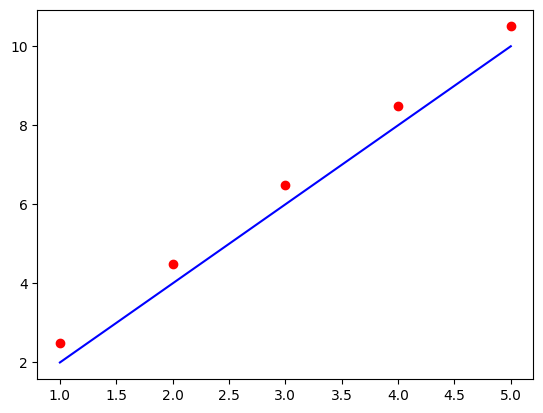

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# nilai pada dataset
x = np.array([1,2,3, 4,5])
y = np.array([y * 2 + 0.5 for y in  x])
plt.scatter(x,y,color="red")


#  garis yang dihasilkan model 
y1 = np.array([y * 2 for  y in x])
plt.plot(x, y1, color="blue")
plt.show()
#  simple linear regresionn

In [2]:
#  library
import tensorflow.compat.v2.feature_column as fc
import pandas as pd
import numpy as np 
import tensorflow as tf 



In [5]:
# data
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
#  "remove the survived column  from dftrain and copy the survived column to y_train"
y_train = dftrain.pop('survived')
#  same as y_train
#  y train will become data testing 
y_eval = dfeval.pop('survived')
#  if you looking for  data in spesific column use thiss : y_eval.loc[index]

In [6]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [7]:
# print five data from top 
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [8]:
#  shape of data train 
dftrain.shape
# (627, 9) means 627 rows and 9 columns

(627, 9)

In [9]:
# print five data from top 
y_eval.head()


0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

<Axes: >

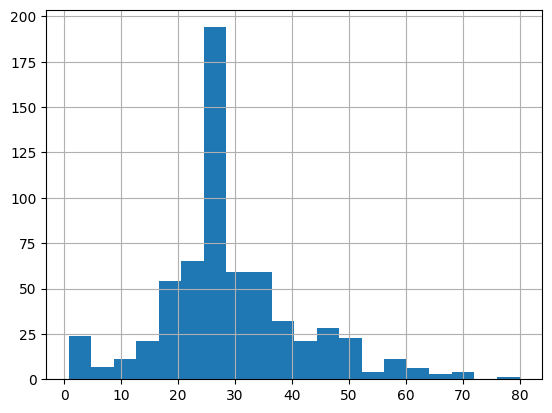

In [10]:
#  create a histogram in age features
dftrain.age.hist(bins=20)

<Axes: >

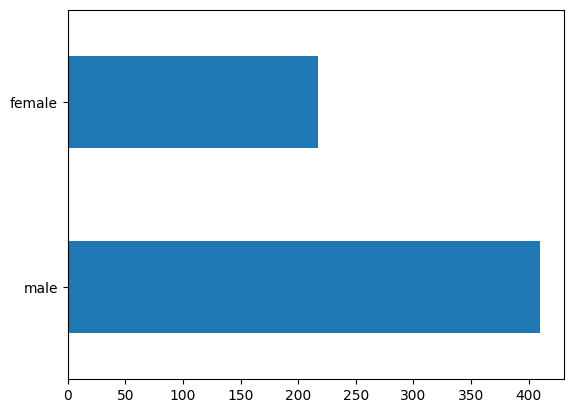

In [11]:
# count sex value and doing compare with hist

dftrain.sex.value_counts().plot(kind="barh")

# barh = bar plot with horizonntal view

<Axes: >

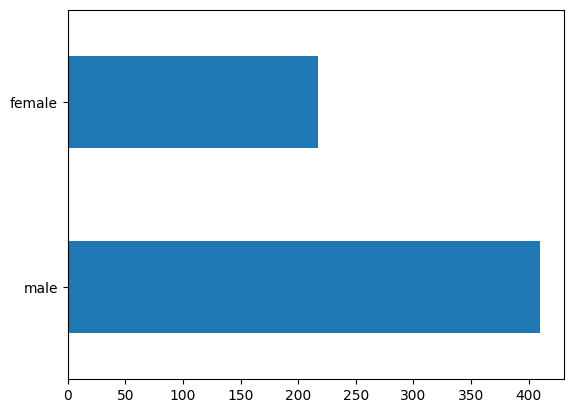

In [12]:
#  coba lagi
dftrain['sex'].value_counts().plot(kind='barh')



<Axes: >

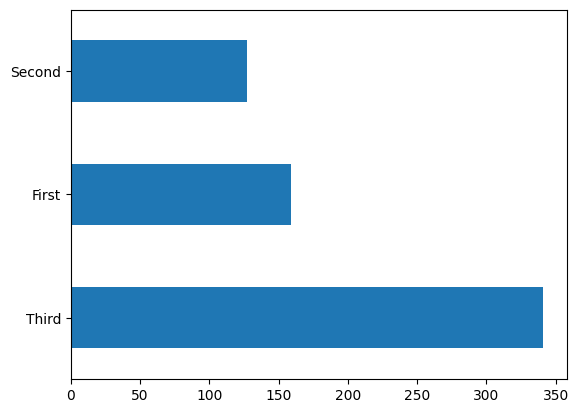

In [13]:
#  count class column using barh 
dftrain['class'].value_counts().plot(kind="barh")


Text(0.5, 0, '% survive')

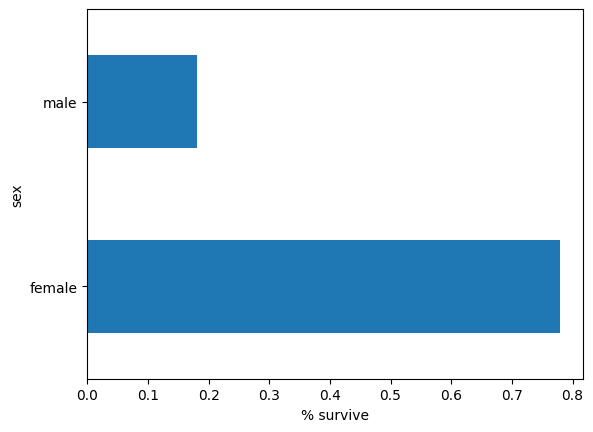

In [14]:
#  menggunakan concat
#  review materi 
pd.concat([dftrain, y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel("% survive")


Text(0.5, 0, '% survived')

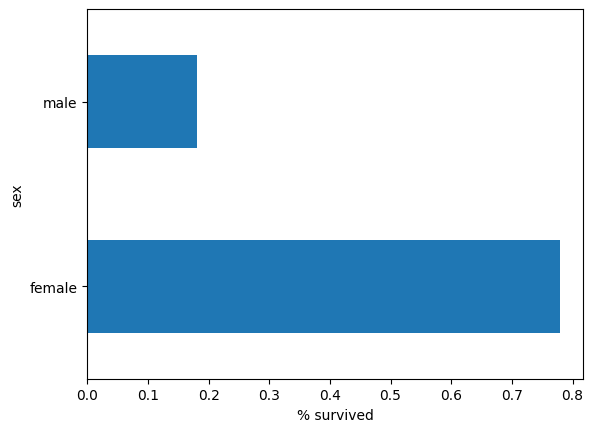

In [15]:
#  display average survived person group by sex
pd.concat([dftrain, y_train],axis = 1).groupby("sex").survived.mean().plot(kind="barh").set_xlabel("% survived")
#  axis = 1 its mean column,so if you remove axis parameter it will contain 0 value which is mean "row"


In [16]:
x = pd.DataFrame(dftrain['sex'])
x

,sex
0,male
1,female
2,female
3,female
4,male
...,...
622,male
623,male
624,female
625,female


In [17]:
y = pd.DataFrame(dftrain['n_siblings_spouses'])
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


Feature Column

In [18]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare'] 
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS: 
    vocbulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocbulary))

for feature_name in NUMERIC_COLUMNS: 
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
print(feature_columns)
#  if numerical data : it will add to the list : NumericColumn(key='age', shape=(1,)
#  explanation NumericColumn(key='age', shape=(1,) : Jika fitur "age" memiliki shape=(1,), itu berarti setiap data titik untuk fitur "age" hanya berisi satu nilai numerik. Misalnya, jika kita memiliki data usia beberapa orang: jadi setiap baris data akan mengandung satu nilai numeri
#  epoch : dalah satu siklus lengkap di mana seluruh dataset pelatihan digunakan untuk melatih model secara iteratif. Dalam satu epoch, model akan melihat dan memproses seluruh contoh atau sampel dalam dataset pelatihan satu kali.
#  jadi bisa dikatakan epoch merupakan kecenderungan model dalam melalakukan proses train pada data, dan dalam ann pelatihan tidak dilakukan sebanyak satu kali saja namun lebih dari itu sehingga nilai epoch akan berbeda beda setiap iterasinya dan ini merupakan cara yag dilakukan model dalam mengenali data yang digunakan untuk model

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', 

In [19]:
dftrain["sex"].unique()

array(['male', 'female'], dtype=object)

INPUT FUNCTION 
remember : this is not neccessary 

In [20]:
from IPython.display import clear_output
def make_input_fn(data_df, label_df, shuffle= True, batch_size=32, epoch=10): 
    #  because data_df, label_df is in pandas dataframe , so it need to be convert into tensorflow object
    def input_function(): 
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
         # create tf.data.Dataset object with data and its label
        #  from_tensor_slices method will return _TensorSliceDataset so that will use in training data 
        if shuffle: 
            ds = ds.shuffle(1000)
            #  randomize order of data
            # Misalnya, jika kita menggunakan metode shuffle(1000) pada dataset yang memiliki 10000 elemen, saat iterasi pertama dimulai, TensorFlow akan mengambil 1000 elemen pertama dari dataset dan mengacaknya dalam buffer acak berukuran 1000. Saat iterasi kedua dimulai, TensorFlow akan mengambil 1000 elemen berikutnya dari dataset dan mencampurnya dengan elemen-elemen yang masih ada dalam buffer acak. Proses ini akan berlanjut hingga seluruh dataset selesai diiterasi
        ds = ds.batch(batch_size=batch_size).repeat(epoch)
        #  split every 32 data and repeat until iteration = epoch
        return ds
    return input_function

# Dalam konteks machine learning, "function object" mengacu pada sebuah objek atau entitas yang merepresentasikan suatu fungsi matematis atau model yang dapat digunakan untuk melakukan prediksi atau pemodelan data. Fungsi tersebut menghubungkan input data dengan output yang diinginkan.

train_input = make_input_fn(dftrain, y_train) 
eval_input = make_input_fn(dfeval,y_eval, shuffle=False, epoch=1)

#  lets build and train the data
linear_est = tf.estimator.LinearClassifier(feature_columns)

linear_est.train(train_input)
clear_output()
result = linear_est.evaluate(eval_input)
print(f'hasil akurasi : {result["accuracy"]}')
print(result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-08-26T10:23:40
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TEDDYD~1\AppData\Local\Temp\tmp_cbri7g6\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.49864s
INFO:tensorflow:Finished evaluation at 2023-08-26-10:23:40
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7348485, accuracy_baseline = 0.625, auc = 0.82124275, auc_precision_recall = 0.7771631, average_loss = 0.5675832, global_step = 200, label/mean = 0.375, loss = 0.5685484, precision = 0.61417323, prediction/mean = 0.5223293, recall = 0.7878788
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: C:\Users\TEDDYD~1\AppData\Local\Temp\tmp_cbri7g6\model.ckpt-200
hasil akurasi : 0.7348484992980957
{'accuracy': 0.734

INFO:tensorflow:Calling model_fn.


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TEDDYD~1\AppData\Local\Temp\tmp_cbri7g6\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.1697476


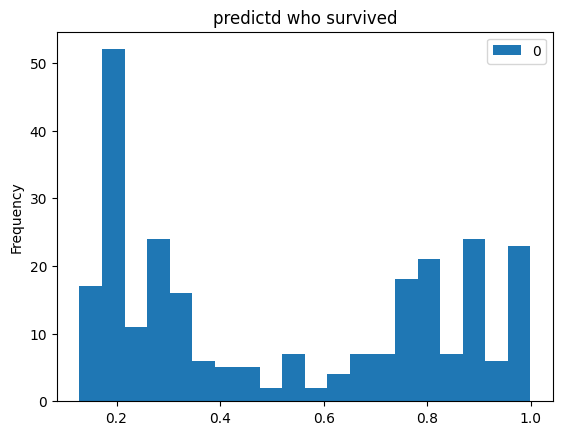

In [21]:
#  ini cuma test materi saja
import pandas as pd
predict1 = linear_est.predict(eval_input)
predict1_list = list(predict1)
data_pandas = pd.DataFrame(predict['probabilities'][1] for predict in predict1_list)

data_pandas.plot(bins=20, title="predictd who survived", kind="hist")
#  note: untuk mengeluarkan hasil prediksi maka harus dikonversi terlebih dahulu ke dalam bentuk list
predict1
# mencari nilai probabilities yang speesifik 
print(predict1_list[0]['probabilities'][1])

In [22]:
result['accuracy']


0.7348485

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TEDDYD~1\AppData\Local\Temp\tmp_cbri7g6\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<Axes: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

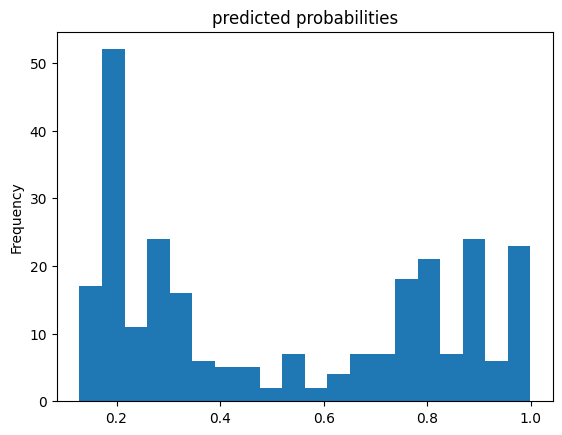

In [23]:
# melakukan uji terhadap data
pred_dicts = list(linear_est.predict(eval_input))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')
# result = linear_est.predict(eval_input)
# # probs = pd.Series([])
# result

In [24]:
list_temp = list(linear_est.predict(eval_input)) 
list_temp[0]["probabilities"]

# amabil ihdex ke 0 dan kemudian ambil key probability 
# jika diambil index ke 0 dan kemudian diambil probability maka yang dihasilkan adalah : array([0.9605771 , 0.03942294], yang dimana 0.9605771 menyatakan tidak selamat dan sisanya adalah peluang selamat dari korban 
# Batch data dalam konteks generator merujuk pada sekelompok data yang diambil dari dataset utama dalam satu iterasi atau langkah
# Misalnya, jika Anda memiliki 1000 data pelatihan dan menggunakan batch size 32, maka setiap iterasi akan mengambil 32 data dari dataset untuk digunakan oleh model. Setelah semua data telah diambil sebanyak 32 per kali iterasi, parameter model diperbarui berdasarkan performa model pada batch tersebut
#  Penggunaan batch dalam pelatihan model machine learning atau deep learning membantu menghemat penggunaan memori, terutama ketika Anda bekerja dengan dataset yang besar. Ini terjadi karena seluruh dataset tidak perlu dimuat ke dalam memori pada saat yang sama.

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TEDDYD~1\AppData\Local\Temp\tmp_cbri7g6\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


array([0.8302524, 0.1697476], dtype=float32)

Pada setiap epoch dalam pelatihan model, proses pengacakan (shuffle) dapat berpengaruh pada cara model mempelajari data dan ketergantungannya terhadap urutan data dalam dataset. Mari kita jelaskan bagaimana cara kerja shuffle dengan epoch dan bagaimana keterkatannya dengan contoh.

1. **Cara Kerja Shuffle dengan Epoch**:

- Pada awal pelatihan, dataset akan diacak secara acak dengan ukuran buffer acak tertentu (misalnya, 1000).
- Model akan melihat data dalam urutan acak karena dataset telah diacak.
- Model akan memproses seluruh dataset dalam satu epoch, yaitu melihat dan mempelajari setiap contoh dalam dataset.
- Setelah satu epoch selesai, dataset akan diacak kembali, dan model akan kembali melihat dataset yang telah diacak pada epoch berikutnya.
- Proses ini berlanjut hingga jumlah epoch yang ditentukan tercapai.

2. **Keterkaitan Shuffle dengan Model**:

Proses pengacakan (shuffle) di setiap epoch sangat membantu dalam mencegah model untuk mengandalkan atau mengingat urutan data tertentu dalam dataset. Ketika model terpapar pada pola urutan data yang berulang dalam beberapa epoch, model dapat "menghafal" pola tersebut dan kurang mampu untuk menggeneralisasi dengan baik pada data baru. Dengan menggunakan shuffle pada setiap epoch, model akan melihat data dalam urutan yang berbeda-beda pada setiap epoch, dan ini membantu model untuk belajar pola yang lebih umum dan lebih baik dalam mengatasi data yang belum pernah dilihat sebelumnya.

Contoh dengan TensorFlow:

Misalkan kita memiliki data berikut:

```python
import tensorflow as tf

data = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
dataset = tf.data.Dataset.from_tensor_slices(data)

# Jumlah epoch yang diinginkan
num_epochs = 3

# Menggunakan shuffle(5) untuk pengacakan dengan buffer acak 5 elemen
dataset = dataset.shuffle(5)

for epoch in range(num_epochs):
    print("Epoch:", epoch + 1)
    for data_point in dataset:
        print(data_point)
```

Outputnya akan berbeda pada setiap epoch, karena dataset diacak ulang setiap kali masuk ke epoch baru. Contoh output untuk tiga epoch mungkin akan seperti ini:

```
Epoch: 1
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
...
Epoch: 2
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
...
Epoch: 3
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
...
```

Perhatikan bahwa elemen-elemen dalam dataset diacak ulang pada setiap epoch, memberikan variasi urutan data yang berbeda-beda pada setiap epoch dalam proses pelatihan model. Hal ini membantu model untuk belajar dari berbagai variasi data dan mengurangi ketergantungan pada urutan data yang mungkin ada dalam dataset.

Tidak, itu bukan cara kerja yang tepat untuk `shuffle(5)` dalam TensorFlow. Saya mohon maaf jika jawaban sebelumnya menyebabkan kebingungan.

Pada kenyataannya, penggunaan `shuffle(5)` dalam TensorFlow tidak berarti mengambil 5 data sembarang dari dataset dan mengacaknya. Sebaliknya, `shuffle(5)` menggunakan buffer acak berukuran 5 elemen untuk mengacak urutan elemen-elemen dalam dataset.

Cara kerja `shuffle(5)` adalah sebagai berikut:

1. Pada awalnya, buffer acak akan diisi dengan 5 elemen pertama dari dataset.
2. TensorFlow akan mencampur elemen-elemen dalam buffer acak menggunakan metode pengacakan yang sesuai.
3. Saat data diminta atau diambil oleh model atau dalam iterasi, TensorFlow akan mengambil elemen-elemen dari buffer acak dan menggantinya dengan elemen-elemen dari dataset yang belum digunakan.
4. Setelah buffer acak habis, buffer akan diisi ulang dengan 5 elemen pertama dari dataset yang telah diacak ulang.

Ini berarti setiap epoch menggunakan buffer acak berukuran 5 elemen untuk mengacak urutan elemen-elemen dalam dataset, bukan hanya mengambil 5 data sembarang dan mengacaknya.

Jadi, `shuffle(5)` pada dasarnya mengacak urutan elemen-elemen dalam dataset dengan menggunakan buffer acak berukuran 5 elemen. Buffer acak ini akan diisi ulang setelah selesai digunakan dalam satu epoch dan digunakan kembali pada epoch berikutnya untuk mengacak urutan elemen dalam dataset.


Pada baris kode `ds = ds.batch(batch_size=batch_size).repeat(epoch)`, kode tersebut memiliki arti sebagai berikut:

1. `.batch(batch_size=batch_size)`: Kode ini berfungsi untuk menggabungkan beberapa contoh dari dataset menjadi batch yang lebih besar. Parameter `batch_size` adalah ukuran dari setiap batch. Dalam hal ini, dataset `ds` akan diubah menjadi dataset dengan batch-batch yang berisi `batch_size` contoh data dalam satu batch.

2. `.repeat(epoch)`: Kode ini berfungsi untuk mengulangi dataset (repeating) sebanyak `epoch` kali. Ini berarti dataset akan diiterasi sebanyak `epoch` kali dalam proses pelatihan atau evaluasi model.

Mari kita berikan penjelasan lebih mendalam:

Misalkan kita memiliki dataset `ds` yang berisi data `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` dan kita ingin melakukan proses pelatihan atau evaluasi model menggunakan batch dengan ukuran 3 dan melakukan 2 epoch pada dataset tersebut.

```python
import tensorflow as tf

# Data dalam bentuk tensor
data_tensor = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Membentuk dataset dari tensor
ds = tf.data.Dataset.from_tensor_slices(data_tensor)

# Mengatur ukuran batch dan mengulangi dataset sebanyak 2 epoch
batch_size = 3
epoch = 2
ds = ds.batch(batch_size=batch_size).repeat(epoch)

# Menampilkan setiap batch dalam dataset selama 2 epoch
for batch in ds:
    print(batch)
```

Outputnya akan menjadi:

```
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)
tf.Tensor([10], shape=(1,), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)
tf.Tensor([10], shape=(1,), dtype=int32)
```

Pada hasil output di atas, kita melihat bahwa dataset `ds` diulang dua kali karena `repeat(epoch)` dengan `epoch=2`. Setiap iterasi berisi batch dengan ukuran 3 (kecuali batch terakhir yang berukuran 1 karena jumlah data tidak bisa dibagi rata). Proses ini berlanjut hingga seluruh dataset diiterasi dua kali (2 epoch).

Dengan cara ini, dataset `ds` akan berulang sebanyak 2 kali dengan setiap iterasi berisi batch-batch yang berukuran 3 (kecuali batch terakhir). Hal ini memungkinkan kita untuk melakukan pelatihan atau evaluasi model dalam beberapa epoch dengan menggunakan batch data, yang sering digunakan dalam proses pembelajaran mesin untuk meningkatkan kecepatan dan efisiensi dalam memproses data.

In [25]:
ds = tf.data.Dataset.from_tensor_slices((dict(dftrain), y_train))
# Contoh penggunaan from_tensor_slices adalah ketika Anda ingin memuat data yang sudah ada dalam bentuk array atau tensor menjadi dataset yang dapat digunakan dalam pelatihan atau evaluasi model. Jika data Anda sudah ada dalam bentuk yang sesuai dengan input model, Anda tidak perlu menggunakan metode ini
# Misalnya, jika Anda menggunakan TensorFlow, dan data Anda sudah dalam bentuk tensor atau array, Anda bisa langsung menggunakan data tersebut untuk proses pelatihan tanpa perlu konversi khusus menggunakan from_tensor_slices
ds

<_TensorSliceDataset element_spec=({'sex': TensorSpec(shape=(), dtype=tf.string, name=None), 'age': TensorSpec(shape=(), dtype=tf.float64, name=None), 'n_siblings_spouses': TensorSpec(shape=(), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.string, name=None), 'deck': TensorSpec(shape=(), dtype=tf.string, name=None), 'embark_town': TensorSpec(shape=(), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(), dtype=tf.string, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [26]:
data_frame =  pd.DataFrame(ds)
data_frame

,0,1
0,"{'sex': tf.Tensor(b'male', shape=(), dtype=str...","tf.Tensor(0, shape=(), dtype=int64)"
1,"{'sex': tf.Tensor(b'female', shape=(), dtype=s...","tf.Tensor(1, shape=(), dtype=int64)"
2,"{'sex': tf.Tensor(b'female', shape=(), dtype=s...","tf.Tensor(1, shape=(), dtype=int64)"
3,"{'sex': tf.Tensor(b'female', shape=(), dtype=s...","tf.Tensor(1, shape=(), dtype=int64)"
4,"{'sex': tf.Tensor(b'male', shape=(), dtype=str...","tf.Tensor(0, shape=(), dtype=int64)"
...,...,...
622,"{'sex': tf.Tensor(b'male', shape=(), dtype=str...","tf.Tensor(0, shape=(), dtype=int64)"
623,"{'sex': tf.Tensor(b'male', shape=(), dtype=str...","tf.Tensor(0, shape=(), dtype=int64)"
624,"{'sex': tf.Tensor(b'female', shape=(), dtype=s...","tf.Tensor(1, shape=(), dtype=int64)"
625,"{'sex': tf.Tensor(b'female', shape=(), dtype=s...","tf.Tensor(0, shape=(), dtype=int64)"


Classification 

In [27]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [28]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
#  header = 0 menandakan di baris ke 0  / awal kolom akan dijadikan header
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
#  mendapatkan data dengan bantuan tf.keras.utils.get_file()

# note:karena names diset menjaadi CSV_COLUMN_NAME maka 

In [29]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [30]:
test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [31]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [32]:
#  make input function 
#   tf.data.Dataset.from_tensor_slices(data) berperan agar data dapat dibagi menjadi beberapa  bath sesuai dengan yang diinginkan 
def input_function(features, labels, training=True,batch_size = 256):
    data_input = tf.data.Dataset.from_tensor_slices((dict(features), labels)) 
    # ingat di dalam python, parameter yang ada default value harus berada di paling kanan, jika tidak maka akan eror
    if training:
        data_input = data_input.shuffle(1000).repeat()
    return data_input.batch(batch_size)

In [33]:
# # ini merupakan penjelasan dari fungsi tf.data.Dataset.from_tensor_slices(data)
# import tensorflow as tf

# # Contoh data
# data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# # Membuat objek dataset
# dataset = tf.data.Dataset.from_tensor_slices(data)

# # Menampilkan isi dataset

# dataset = dataset.batch(5)
# for element in dataset:
#     print(element.numpy())



In [34]:
# `train_y = train.pop("Species")`

In [35]:
print(train.keys)

<bound method NDFrame.keys of      SepalLength  SepalWidth  PetalLength  PetalWidth
0            6.4         2.8          5.6         2.2
1            5.0         2.3          3.3         1.0
2            4.9         2.5          4.5         1.7
3            4.9         3.1          1.5         0.1
4            5.7         3.8          1.7         0.3
..           ...         ...          ...         ...
115          5.5         2.6          4.4         1.2
116          5.7         3.0          4.2         1.2
117          4.4         2.9          1.4         0.2
118          4.8         3.0          1.4         0.1
119          5.5         2.4          3.7         1.0

[120 rows x 4 columns]>


In [36]:
feature_columns2 = []
for x in train.keys():
    #  keys() tidak hanya dimiliki oleh dict tapi juga dimiliki oleh pandas dataframe
    # ambil semua kolom yang ada di dalam train dan kemudian appned ke dalamn sebuah list kosong 
    feature_columns2.append(tf.feature_column.numeric_column(key=x))

print(feature_columns2) 

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [37]:
#  membuat model neural network
modelDNN = tf.estimator.DNNClassifier(
    feature_columns=feature_columns2, 

    hidden_units=[30, 10],
    # hidden_units=[30, 10], menandakan akan dibangun 30 layers dan setiap  nodes akan ada 10 layers
    n_classes=3
)
# jadi bisa diakakan node 1 = input node = 10 layers
# hidden layers = hidden layer = 10 layers
# output layers = 10 layers dan ada 3 kelas yang bisa dijadikan acuan klasifikasi

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\TEDDYD~1\\AppData\\Local\\Temp\\tmp2laslwpe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': T

In [38]:
train_y

0      2
1      1
2      2
3      0
4      0
      ..
115    1
116    1
117    0
118    0
119    1
Name: Species, Length: 120, dtype: int64

In [39]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [40]:
train.shape

(120, 4)

In [41]:
# # proses training



# modelDNN.train(
#     #  def input_function(features, labels, training=True,batch_size = 256):
#     input_fn=lambda: input_function(train, train_y, training=True),
#  steps = 5000 menandakan ada berapa banyak iterasi yang akan digunakan
#     steps = 5000
# )
# # len_args = len(inspect.getfullargspec(func)[0]


# # from core
#


# links to model : https://colab.research.google.com/drive/18gC1hcivxCOOCaAgbSXYKgbJNlPwqjcN#scrollTo=yE5UmIcrDlL1 (tedi dharmaa)

In [42]:
#  perbedaan dari clussterisasi dengan classification
#  pada clusterisasi maka tidak akan ada label penentu (class)
#  pada classification maka akan ada label penentu (class)

CLUSTERING

In [43]:
# aturan clustering
# 0 menandakan hari ke n + 1 adalah hari cerah dan 1 menandakn hari yang mendung
# peluang di hari pertama mendung adalah 80% 
#  peluang jika hari ke n + 1 mendung dimana hari ke n cerah adalah 0.3
#  peluang jika hari ke n + 1 cerah dimana hari ke n mendung adalah 0.2 
# standar deviasi dan mean dari hari yang mendung  adalah 5 dan 0 serta standar deviasi dan mean dari hari yang cerah adalah 10 dan 15 
# 

# note : tensorflow_probabilty merupakan library yang berbeda dari tensorflow biasa jadi harus dilakukan instalasi dl
import tensorflow_probability as tfp
tfd = tfp.distributions

firs_day = tfd.Categorical(probs=[0.8, 0.2])
transition_day = tfd.Categorical(probs=[[0.7, 0.3],[0.2, 0.8]])

observation_distribution = tfd.Normal(loc=[0. , 15.], scale = [5., 10.])

In [44]:
markov_model = tfd.HiddenMarkovModel(
    initial_distribution = firs_day,
    transition_distribution = transition_day,
    observation_distribution = observation_distribution,
    num_steps = 7
)
# num steps = 7 akan bertindak untuk melakukan prediksi 7 hari kedepan 

In [45]:
mean = markov_model.mean()
# tf.compat.v1.Session() as sess:? 
print(mean)
# karena masihn dalam bentuk tensor maka gunakan numpy() agar diterjemahlkan ke dalanm bentuk numpy array
print(mean.numpy())
# yang diprediksi disini adalah temperatur

tf.Tensor([3.        5.9999995 7.4999995 8.25      8.625     8.812501  8.90625  ], shape=(7,), dtype=float32)
[3.        5.9999995 7.4999995 8.25      8.625     8.812501  8.90625  ]
